# PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("Country-data.csv")

data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

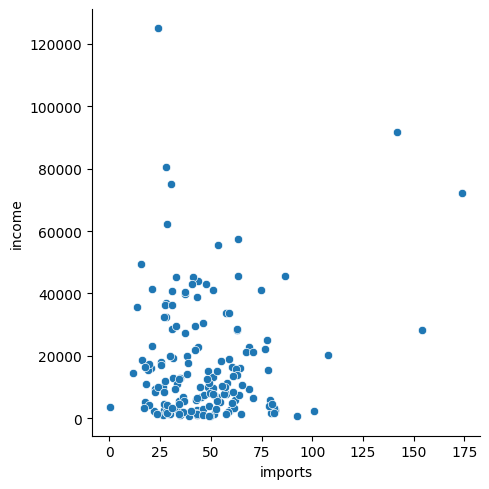

In [6]:
import seaborn as sns
sns.relplot(data=data, x = "imports", y="income")

In [7]:
countries=data.country

In [8]:
data=data.drop(columns="country")

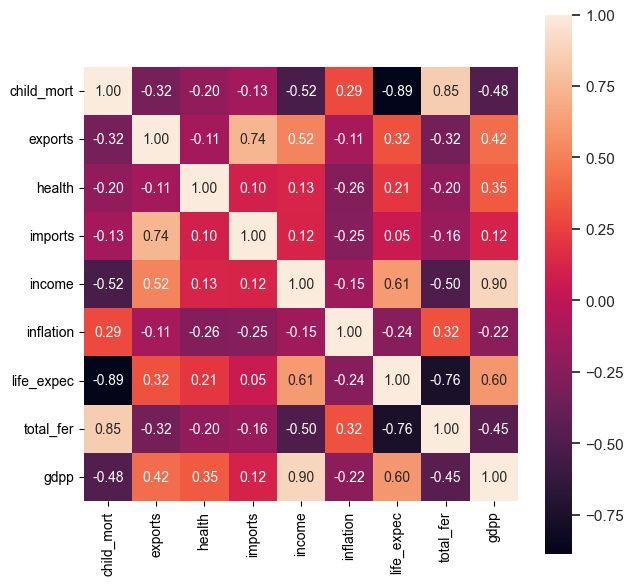

In [9]:
import seaborn as sns
corr = data.corr()
a4_dims = (7, 7) # dimensiones del plot
fig, ax = plt.subplots(figsize=a4_dims)
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1) # tamaño letras plot
hm = sns.heatmap(cm, 
                 cbar=True, # Leyenda 
                 annot=True, # Numeros
                 square=True, # izquerda nombres en horizontal
                 fmt='.2f', # formato
                 annot_kws={'size': 10},# tamaño numeros
                 xticklabels=corr.columns.values, # nombres
            yticklabels=corr.columns.values)
plt.show()

In [10]:
# scaling the data before PCA
scaler=StandardScaler().fit(data)
dt=scaler.transform(data)
data = pd.DataFrame(dt, columns=data.columns)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [11]:
pca = PCA(n_components=9) # lo cargo
pca.fit(data) # ha calculado las 9 primeras componentes
# pca es un objeto transformador


PCA(n_components=9)

In [14]:
# Sería nuestra V en la SVD
print('shape =', pca.components_.shape)
print(pca.components_.round(3)) # 9 son las variables originales

shape = (9, 9)
[[-0.42   0.284  0.151  0.161  0.398 -0.193  0.426 -0.404  0.393]
 [ 0.193  0.613 -0.243  0.672  0.023 -0.008 -0.223  0.155 -0.046]
 [-0.03   0.145 -0.597 -0.3    0.302  0.643  0.114  0.02   0.123]
 [ 0.371  0.003  0.462 -0.072  0.392  0.15  -0.204  0.378  0.532]
 [-0.169  0.058  0.518  0.255 -0.247  0.715  0.108 -0.135 -0.18 ]
 [ 0.201 -0.059  0.007 -0.03   0.16   0.066 -0.601 -0.751  0.017]
 [-0.079 -0.707 -0.25   0.592  0.096  0.105  0.018  0.029  0.243]
 [-0.683 -0.014  0.072 -0.029  0.353 -0.012 -0.505  0.293 -0.25 ]
 [ 0.328 -0.123  0.113  0.099  0.613 -0.025  0.294 -0.026 -0.626]]


In [15]:
pca.components_[0]

array([-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
       -0.19317293,  0.42583938, -0.40372896,  0.39264482])

In [18]:
np.linalg.norm(pca.components_[2])

0.9999999999999997

In [19]:
data_transformed = pca.transform(data)  # metodo que transforma el antiguo dataset al nuevo

In [20]:
data_transformed[0,:]

array([-2.91302459,  0.09562058, -0.7181185 ,  1.00525464, -0.15831004,
       -0.25459744,  0.38300026,  0.41507602, -0.01414844])

In [21]:
data.shape

(167, 9)

In [22]:
print("shape samples:",data_transformed.shape)

shape samples: (167, 9)


In [24]:
# explained_variance_ratio es el vector de varianzas explicadas por componente
np.cumsum(pca.explained_variance_ratio_)


array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

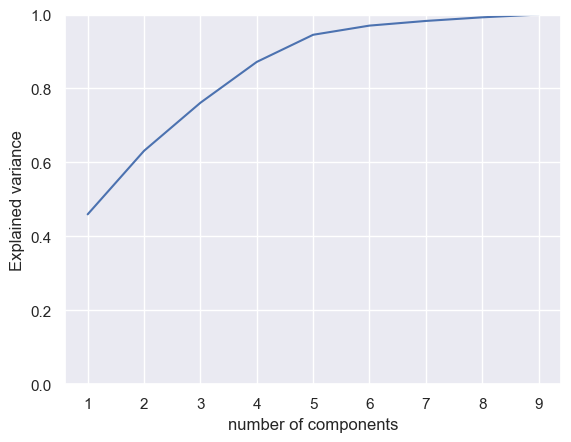

In [25]:
#Explained variance
plt.plot(range(1, 10), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.ylim(0,1)
plt.show()

In [26]:
pca = PCA(n_components=4) # lo cargo
pca.fit(data) # ha calculado las 4 primeras componentes
# pca es un objeto transformador

PCA(n_components=4)

In [27]:
data_transformed = pca.transform(data)  # metodo que transforma el antiguo dataset al nuevo
dt_t=pd.DataFrame(data_transformed.round(2), columns=["dim1","dim2","dim3","dim4"])

In [29]:
dt_t.head()

,dim1,dim2,dim3,dim4
0,-2.91,0.10,-0.72,1.01
1,0.43,-0.59,-0.33,-1.16
2,-0.29,-0.46,1.22,-0.87
3,-2.93,1.70,1.53,0.84
4,1.03,0.14,-0.23,-0.85


In [30]:
dt_t["country"]=countries

In [31]:
dt_t.head()

,dim1,dim2,dim3,dim4,country
0,-2.91,0.10,-0.72,1.01,Afghanistan
1,0.43,-0.59,-0.33,-1.16,Albania
2,-0.29,-0.46,1.22,-0.87,Algeria
3,-2.93,1.70,1.53,0.84,Angola
4,1.03,0.14,-0.23,-0.85,Antigua and Barbuda


In [33]:
pca.components_.round(3)

array([[-0.42 ,  0.284,  0.151,  0.161,  0.398, -0.193,  0.426, -0.404,
         0.393],
       [ 0.193,  0.613, -0.243,  0.672,  0.023, -0.008, -0.223,  0.155,
        -0.046],
       [-0.03 ,  0.145, -0.597, -0.3  ,  0.302,  0.643,  0.114,  0.02 ,
         0.123],
       [ 0.371,  0.003,  0.462, -0.072,  0.392,  0.15 , -0.204,  0.378,
         0.532]])

In [34]:
dt_components=pd.DataFrame(pca.components_, columns=data.columns)

In [ ]:
# components_ = direcciones
# explained_variance_ratio_ = porcentaje de variabilidad de todos los datos, explicados por esa componente

In [35]:
dt_components

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645
1,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022
2,-0.029544,0.144761,-0.596632,-0.299927,0.301548,0.642520,0.113919,0.019549,0.122977
3,0.370653,0.003091,0.461897,-0.071907,0.392159,0.150442,-0.203797,0.378304,0.531995


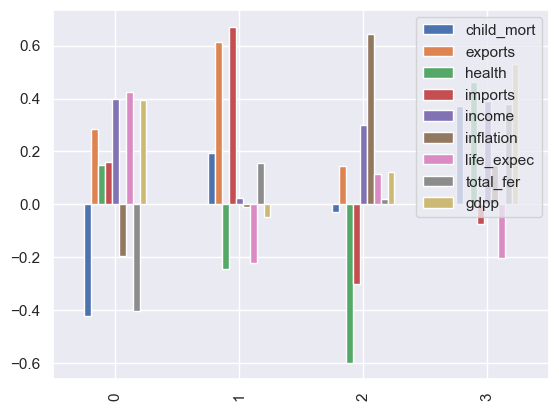

In [36]:
dt_components.plot.bar()
plt.show()

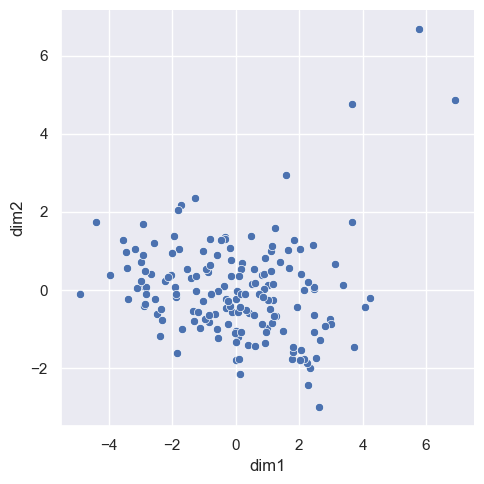

In [43]:
sns.relplot(data=dt_t, x="dim1", y="dim2")

In [38]:
dt_t.sort_values("dim2",ascending=False).head(15)

,dim1,dim2,dim3,dim4,country
133,5.78,6.68,0.65,0.09,Singapore
91,6.92,4.85,1.00,3.13,Luxembourg
98,3.68,4.77,-1.02,-0.50,Malta
131,1.60,2.94,-0.39,-1.40,Seychelles
49,-1.29,2.36,1.78,1.74,Equatorial Guinea
38,-1.73,2.18,1.49,-0.14,"Congo, Rep."
87,-1.80,2.04,-2.50,1.07,Lesotho
66,-4.41,1.74,-1.46,1.79,Haiti
73,3.67,1.73,-0.52,0.99,Ireland
3,-2.93,1.70,1.53,0.84,Angola


In [61]:
dt_t.drop(columns=["country"]).corr().round(3)

,dim1,dim2,dim3,dim4
dim1,1.0,-0.0,0.0,0.0
dim2,-0.0,1.0,-0.0,0.0
dim3,0.0,-0.0,1.0,0.0
dim4,0.0,0.0,0.0,1.0


,Explained Variance,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Dimension 1,0.4595,-0.4195,0.2839,0.1508,0.1615,0.3984,-0.1932,0.4258,-0.4037,0.3926
Dimension 2,0.1718,0.1929,0.6132,-0.2431,0.6718,0.0225,-0.0084,-0.2227,0.1552,-0.0460
Dimension 3,0.1300,-0.0295,0.1448,-0.5966,-0.2999,0.3015,0.6425,0.1139,0.0195,0.1230
Dimension 4,0.1105,0.3707,0.0031,0.4619,-0.0719,0.3922,0.1504,-0.2038,0.3783,0.5320


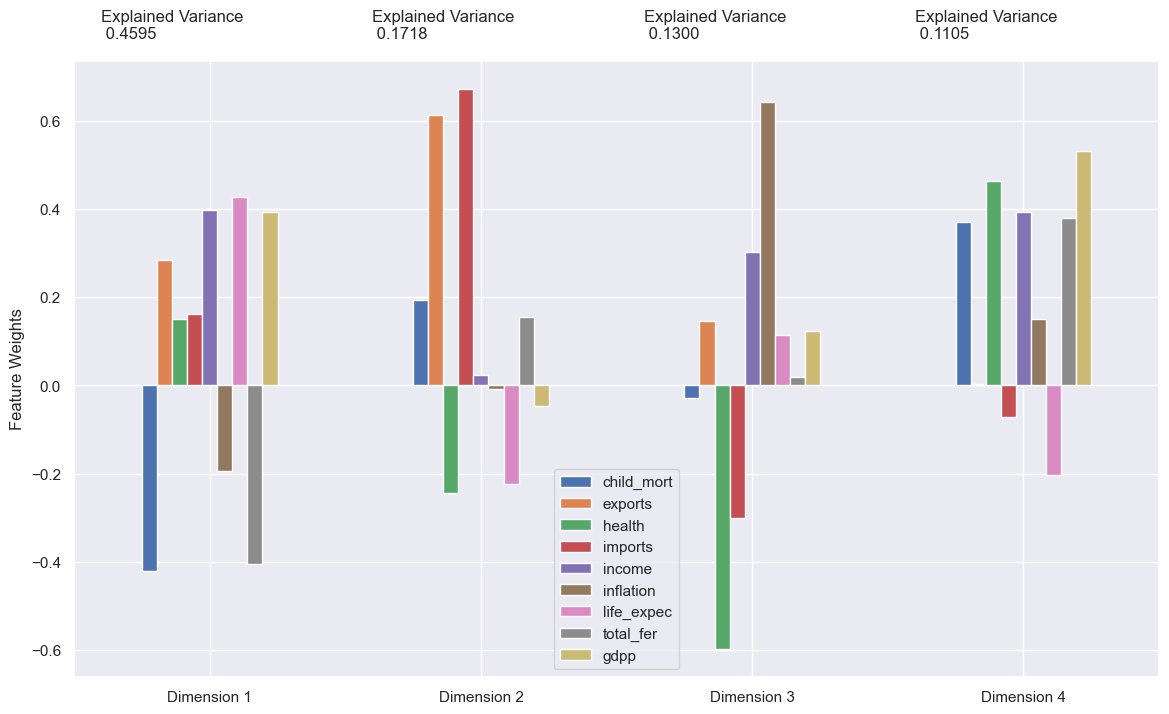

In [46]:
from PCAfunctions import *
# esto es un paquete propio con funciones propias
pca_results(data, pca)
# datos originales
# y objeto pca

# BiPlot (siempre se tiene que hacer en 2 componentes)

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

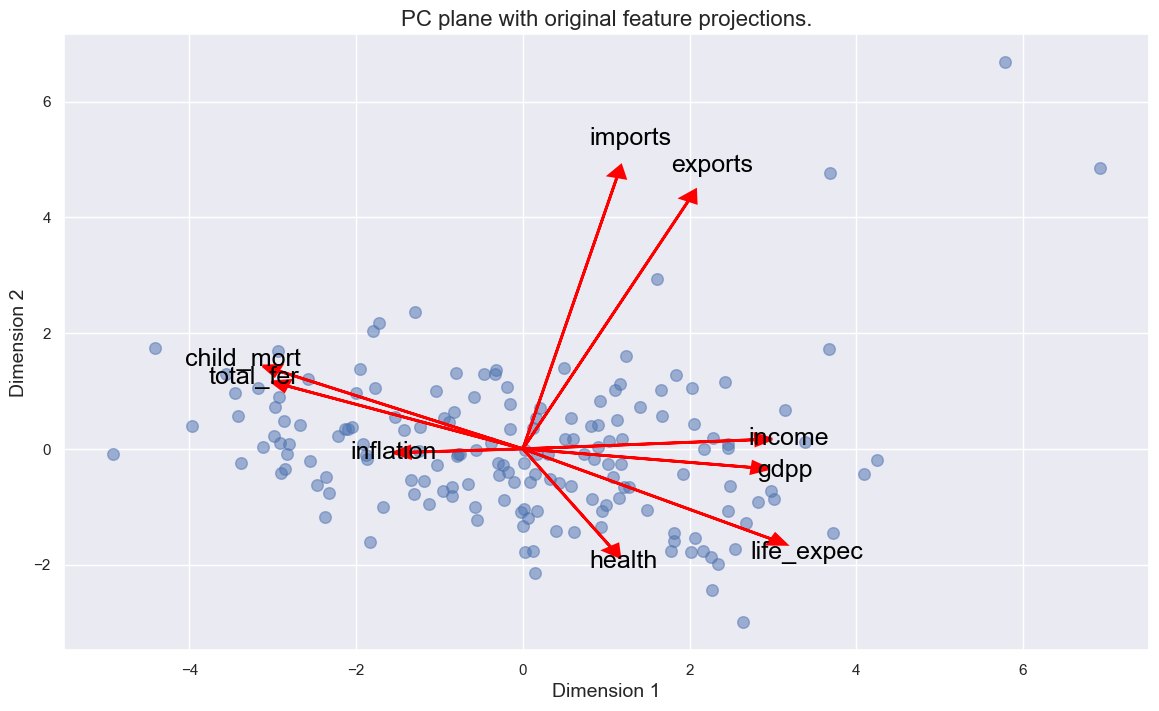

In [47]:
# pd.set_option('display.expand_frame_repr', False)

# analisis pca en 2 dimensiones
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# función del archivo PCAfunctions
biplot(data, reduced_data, pca)

# IRIS

In [48]:
# =============================================================================
# PCA iris
# =============================================================================
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
features=iris['feature_names']
target=iris['target']
target_names=iris['target_names']
data=iris['data']
dt=pd.DataFrame(data,columns=features)
dt['target']=target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [49]:
dt.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


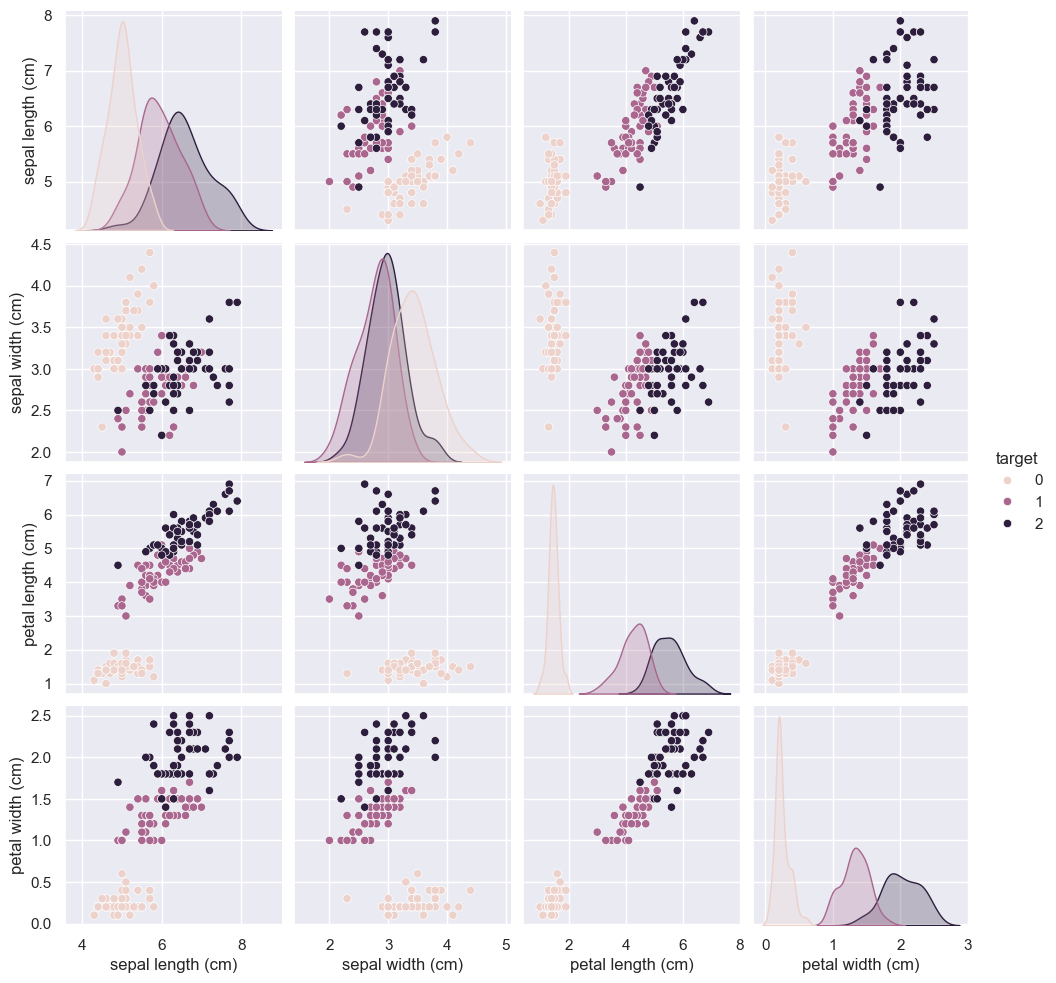

In [50]:
# scatter plot
sns.pairplot(dt, hue="target")

In [51]:
scaler = StandardScaler().fit(data)
data = scaler.transform(data)
data = pd.DataFrame(data, columns=dt.columns[0:4])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [52]:
# implementing PCA
pca = PCA(n_components=4).fit(data)
pca_samples = pca.transform(data)

In [53]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [54]:
dt_components = pd.DataFrame(pca.components_,columns=iris['feature_names'])

In [55]:
dt_components

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,-0.719566,0.244382,0.142126,0.634273
3,-0.261286,0.123510,0.801449,-0.523597


<Axes: >

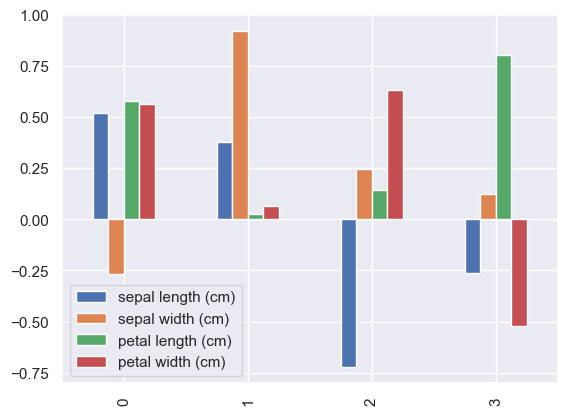

In [56]:
dt_components.plot.bar()

,Explained Variance,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Dimension 1,0.7296,0.5211,-0.2693,0.5804,0.5649
Dimension 2,0.2285,0.3774,0.9233,0.0245,0.0669
Dimension 3,0.0367,-0.7196,0.2444,0.1421,0.6343
Dimension 4,0.0052,-0.2613,0.1235,0.8014,-0.5236


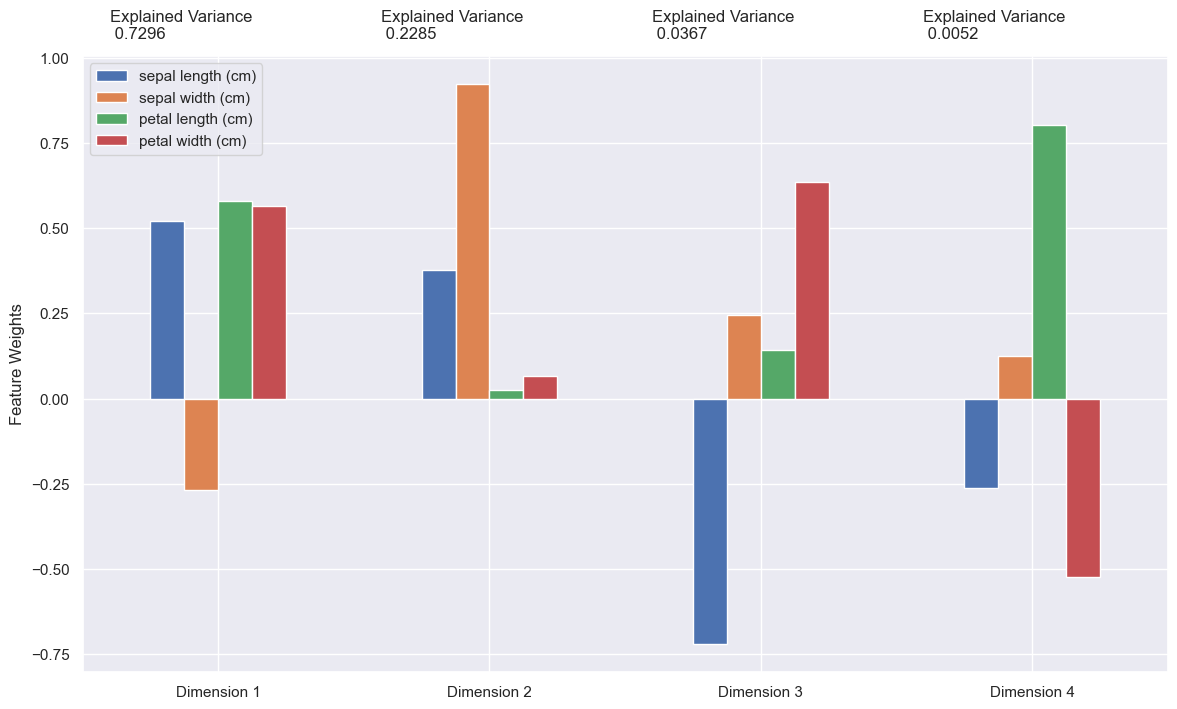

In [38]:
pca_results(data, pca)

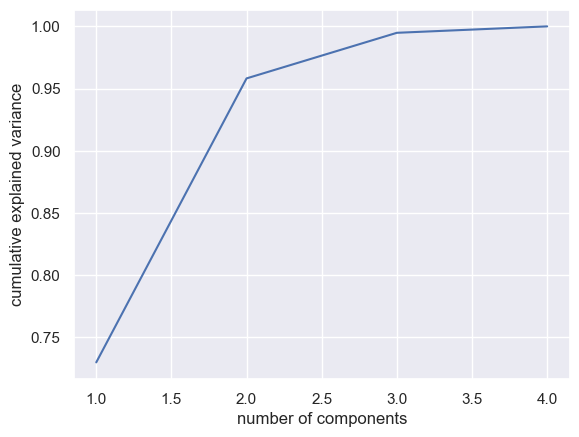

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [57]:
#Explained variance
plt.plot(range(1,5), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
np.cumsum(pca.explained_variance_ratio_)

In [62]:
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [63]:
reduced_data['target']=target

In [64]:
reduced_data.head()

,Dimension 1,Dimension 2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


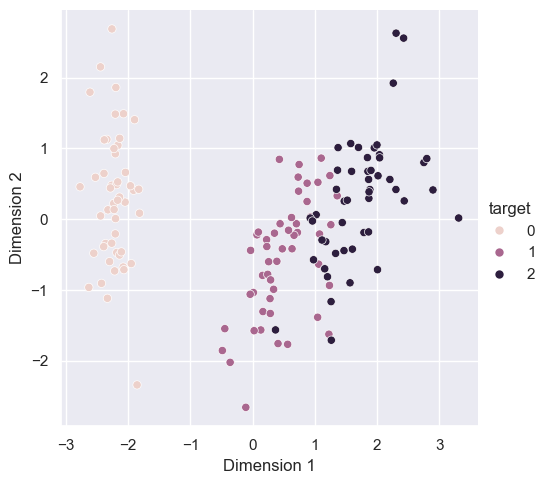

In [65]:
# biplot
sns.relplot(x = "Dimension 1", 
            y = "Dimension 2",
            data = reduced_data, 
            hue="target")

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
cluster_data=reduced_data[["Dimension 1","Dimension 2"]]
kmeans.fit(cluster_data)
reduced_data["labels_cluster"] = kmeans.labels_ # asignas los labels

C:\Users\Propietario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Propietario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [69]:
reduced_data

,Dimension 1,Dimension 2,target,labels_cluster
0,-2.264703,0.480027,0,1
1,-2.080961,-0.674134,0,1
2,-2.364229,-0.341908,0,1
3,-2.299384,-0.597395,0,1
4,-2.389842,0.646835,0,1
...,...,...,...,...
145,1.870503,0.386966,2,0
146,1.564580,-0.896687,2,2
147,1.521170,0.269069,2,0
148,1.372788,1.011254,2,0


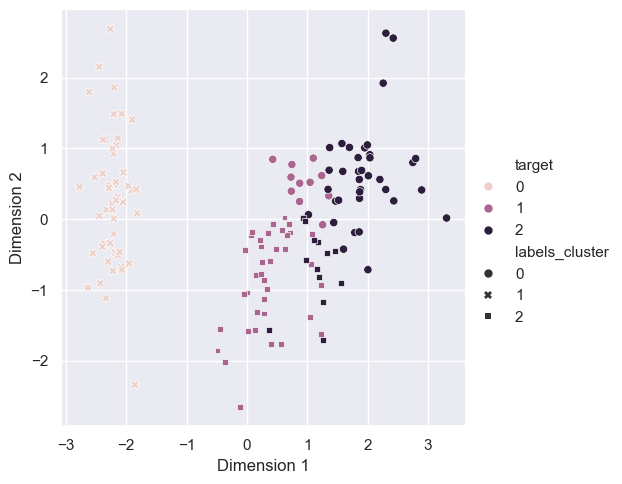

In [70]:
sns.relplot(x = "Dimension 1",
            y = "Dimension 2",
            data=reduced_data, 
            hue="target",
            style="labels_cluster", height=5)

1. Elegir columnas para el analisis. Escalar datos
2. Crear el objeto PCA (con tantas componentes como columnas en el df original)
3. pca.Fit con nuestros datos escalados
4. Estudio de la explaind_variance_ratio=> eleccion del numero final de componentes
5. Hago un nuevo objeto pca(con el numero elegido de componentes)
6. pca.transform: transformamos los datos originales(escalados)-> las nuevas dimensiones (PCi)
7. pca.compontents_ :Entender el significado de las componentes, que simboliza cada nueva dimension
8. visualizar el biplot(es de u paquete y necesita SOLO 2 COMP) (con relplot): Entender la distribución de los datos y de las antiguas dimensiones en las nuevas